In [15]:
import sys
%run rooster_classify_aigrain_with_80.py

Number of element that will be classified:  993


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


Number of element that will be classified:  993


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


Number of element that will be classified:  1004


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


Number of element that will be classified:  1004


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


In [16]:
#Postprocess csv file
from os import path


def hierarchize_flags (df) :
    
    '''
    -1 : Prot corrected by reattrbuting filter (no check needed but I keep track)
    0 : no check needed
    10 : harmonics
    12 : instrumental modulation and long trend (Prot>38 days)
    14 : filter
    16 : 0.4 < proba YesRot < 0.8
    18 : CPCB with Prot > 7 days
    20 : short trend
    22 : quarters
    24 : the stars has not been treated by the the pipeline
    '''
    
    df.loc[df['flag_check']==3, 'flag_check'] = 10
    df.loc[df['flag_check']==2, 'flag_check'] = 12
    df.loc[df['flag_check']==1, 'flag_check'] = 14
    df.loc[df['flag_check']==7, 'flag_check'] = 16
    df.loc[df['flag_check']==6, 'flag_check'] = 18
    df.loc[df['flag_check']==5, 'flag_check'] = 20
    df.loc[df['flag_check']==4, 'flag_check'] = 22

    return df

def postprocess (df) :
    upDir = path.abspath ('..')
    
    df.index = df.index.rename ('KIC')
    df = df.rename (columns={'label_pred_rot':'label_rot',
                             'label_pred_period':'label_period',
                             'Prot_pred':'Prot_ML',
                             'Sph_pred':'Sph_ML'})
    df = df[['label_rot', 'Prot_ML', 'Prot_error', 'Sph_ML', 'Sph_error',
             'proba_Prot', 'label_period']]
    #dr25 = pd.read_csv (path.join (upDir, 'data/catalogs/dr25.csv'))
    #dr25 = dr25.rename (columns={'log_g_':'logg'})
    #dr25 = dr25.set_index ('KIC')
    #df.update (dr25[['Teff', 'logg']])
    
    df = df.fillna (value=-9999)
    df = df.sort_index ()
    
    #df = hierarchize_flags (df)
    
    return df

In [17]:
df['Prot_error'] = np.abs (df['Prot_error'])
#df_lite = df[['0_rot', '1_rot', 'label_pred_rot', 'label_pred_period', 'Prot_pred', 'Prot_error',
#              'Sph_pred', 'Sph_error', 'flag_reduced']]

df = df.rename (columns={'0_rot':'proba_Prot', '1_rot':'proba_norot'})
df = postprocess (df)
display (df)

label_rot    Prot_ML  Prot_error      Sph_ML  Sph_error  proba_Prot  \
KIC                                                                          
0.0        norot   8.839442    0.203962  433.309322   18.65590    0.293333   
1.0         Prot   1.844148    0.121071  186.157162   17.53230    0.760000   
2.0        norot  18.097681    2.686480  290.809810    8.75087    0.236667   
3.0         Prot  42.375065    3.451500  636.660061   12.51180    0.930000   
4.0        norot  54.379948    4.681090  742.093532   12.87520    0.243333   
...          ...        ...         ...         ...        ...         ...   
1000.0      Prot  26.076746    3.688310  122.660076    3.07474    0.590000   
1001.0      Prot  21.032764    4.245010  307.750393    8.58109    0.510000   
1002.0      Prot  11.827035    1.853870  225.464184    8.38727    0.513333   
1003.0     norot  33.665916    2.002040  189.131634    4.17077    0.443333   
1004.0      Prot  26.963747    3.184270   44.877487    1.10974    0.640000   

       label_period  
KIC                  
0.0             6.0  
1.0             6.0  
2.0             6.0  
3.0             7.0  
4.0             7.0  
...             ...  
1000.0          7.0  
1001.0          7.0  
1002.0          6.0  
1003.0          7.0  
1004.0          7.0  

[1004 rows x 7 columns]

In [7]:
df.loc[df['label_rot']=='Prot']

label_rot    Prot_ML  Prot_error       Sph_ML  Sph_error  proba_Prot
KIC                                                                        
1.0         Prot   1.844148    0.121071   186.157162   17.53230    0.760000
3.0         Prot  42.375065    3.451500   636.660061   12.51180    0.930000
5.0         Prot  24.662617    2.177430   366.628017    9.44666    0.886667
6.0         Prot  35.388329    3.334290   740.968899   15.93670    0.950000
7.0         Prot  13.374421    1.644500   434.785671   15.20940    0.543333
...          ...        ...         ...          ...        ...         ...
999.0       Prot  36.378418    3.513170  1027.107876   21.76940    0.923333
1000.0      Prot  26.076746    3.688310   122.660076    3.07474    0.590000
1001.0      Prot  21.032764    4.245010   307.750393    8.58109    0.510000
1002.0      Prot  11.827035    1.853870   225.464184    8.38727    0.513333
1004.0      Prot  26.963747    3.184270    44.877487    1.10974    0.640000

[902 rows x 6 columns]

In [18]:
from os import path
mainDir = path.abspath ('..')
ref = pd.read_csv (path.join (mainDir, 'data/input_samples/periods_simu_aigrain.csv'), index_col=0)

KID   Pobs  Pobs_min  Pobs_max
0     893468   1.51      1.26      1.77
1    1163450   1.87      1.75      2.02
2    1431090  17.04     17.04     17.04
3    1849570  45.44     43.27     48.07
4    2016950  70.03     53.33     89.21
..       ...    ...       ...       ...
995        0  32.58     32.58     32.58
996        0   5.72      5.72      5.72
997        0  38.13     36.86     39.44
998        0  29.81     23.95     39.71
999        0  36.26     36.26     36.26

[1000 rows x 4 columns]

In [19]:
df = df.join (ref)


In [20]:
df.to_csv ('aigrain_classified_with_80d.csv')

In [12]:
from os import path
mainDir = path.abspath ('..')
ref = pd.read_csv (path.join (mainDir, 'data/input_samples/periods_simu_aigrain.csv'), index_col=0)
df = pd.read_csv ('aigrain_classified_with_80d.csv', index_col=0)

fig, axs = plt.subplots (1, 3, figsize=(30, 10))

axs[0].set_xlabel (r'$P_\mathrm{obs,min}$ (days)', fontsize=25)
axs[1].set_xlabel (r'$P_\mathrm{obs}$ (days)', fontsize=25)
axs[2].set_xlabel (r'$P_\mathrm{obs,max}$ (days)', fontsize=25)
axs[0].set_ylabel (r'$P_\mathrm{rot,ML}$ (days)', fontsize=25)

axs[0].scatter (df['Pobs_min'], df['Prot_ML'], color='red')
axs[1].scatter (df['Pobs'], df['Prot_ML'], color='red')
axs[2].scatter (df['Pobs_max'], df['Prot_ML'], color='red')

cond = df['label_rot']=='Prot'
axs[0].scatter (df.loc[cond, 'Pobs_min'], df.loc[cond, 'Prot_ML'], color='black')
axs[1].scatter (df.loc[cond, 'Pobs'], df.loc[cond, 'Prot_ML'], color='black')
axs[2].scatter (df.loc[cond, 'Pobs_max'], df.loc[cond, 'Prot_ML'], color='black')

for ax in axs :
    ax.set_xlim (-5, 100)
    ax.set_ylim (-5, 100)
    ax.fill_between ([0,150], [0,135], [0,165], alpha=0.3, color='blue')
    ax.fill_between ([0,150], [0,165], [0,195], alpha=0.1, color='green')
    ax.fill_between ([0,150], [0,135], [0,105], alpha=0.1, color='green')

In [13]:
display (df)

label_rot    Prot_ML  Prot_error      Sph_ML  Sph_error  proba_Prot  \
KIC                                                                          
1.0         Prot   1.844148    0.121071  186.157162   17.53230    0.783333   
2.0        norot  18.097681    2.686480  290.809810    8.75087    0.253333   
3.0         Prot  42.375065    3.451500  636.660061   12.51180    0.870000   
4.0        norot  54.379948    4.681090  742.093532   12.87520    0.133333   
5.0         Prot  24.662617    2.177430  366.628017    9.44666    0.860000   
...          ...        ...         ...         ...        ...         ...   
1000.0      Prot  26.076746    3.688310  122.660076    3.07474    0.620000   
1001.0     norot  21.032764    4.245010  307.750393    8.58109    0.496667   
1002.0     norot  12.113857    2.275240  257.907863    9.47595    0.453333   
1003.0     norot  33.665916    2.002040  189.131634    4.17077    0.426667   
1004.0      Prot  26.963747    3.184270   44.877487    1.10974    0.620000   

              KID   Pobs  Pobs_min  Pobs_max  
KIC                                           
1.0     1163450.0   1.87      1.75      2.02  
2.0     1431090.0  17.04     17.04     17.04  
3.0     1849570.0  45.44     43.27     48.07  
4.0     2016950.0  70.03     53.33     89.21  
5.0     2017080.0  23.64     23.64     23.64  
...           ...    ...       ...       ...  
1000.0        NaN    NaN       NaN       NaN  
1001.0        NaN    NaN       NaN       NaN  
1002.0        NaN    NaN       NaN       NaN  
1003.0        NaN    NaN       NaN       NaN  
1004.0        NaN    NaN       NaN       NaN  

[995 rows x 10 columns]

In [11]:
noisy = df.loc[df['KID']!=0]
noisy = noisy.dropna ()
free = df.loc[df['KID']==0]

In [12]:
display (noisy)

label_rot    Prot_ML  Prot_error      Sph_ML  Sph_error  proba_Prot  \
KIC                                                                         
0.0       norot   8.839442    0.203962  433.309322   18.65590    0.293333   
1.0        Prot   1.844148    0.121071  186.157162   17.53230    0.760000   
2.0       norot  18.097681    2.686480  290.809810    8.75087    0.236667   
3.0        Prot  42.375065    3.451500  636.660061   12.51180    0.930000   
4.0       norot  54.379948    4.681090  742.093532   12.87520    0.243333   
...         ...        ...         ...         ...        ...         ...   
745.0      Prot  10.771726    0.737265  372.090908   14.50290    0.880000   
746.0      Prot  29.145226    2.307280  543.896267   12.88940    0.930000   
747.0      Prot  13.510294    1.031390  973.149685   33.86760    0.986667   
748.0     norot  10.671629    0.878296  225.356808    8.83403    0.263333   
749.0      Prot  23.183830    2.350770  716.923427   19.05100    0.950000   

              KID    Pobs  Pobs_min  Pobs_max  
KIC                                            
0.0      893468.0    1.51      1.26      1.77  
1.0     1163450.0    1.87      1.75      2.02  
2.0     1431090.0   17.04     17.04     17.04  
3.0     1849570.0   45.44     43.27     48.07  
4.0     2016950.0   70.03     53.33     89.21  
...           ...     ...       ...       ...  
745.0  11909700.0   10.99     10.99     10.99  
746.0  11974300.0   30.63     28.68     32.12  
747.0  12007800.0   13.49     12.10     15.32  
748.0  12016700.0  170.03     56.86    363.07  
749.0  12019300.0   24.70     22.78     27.21  

[749 rows x 10 columns]

In [13]:
display (free)

label_rot    Prot_ML  Prot_error       Sph_ML  Sph_error  proba_Prot  \
KIC                                                                          
750.0     norot   4.851982    0.186634   287.504238    16.6951    0.483333   
751.0      Prot  31.668884    3.107230  1311.743130    29.8172    0.973333   
752.0      Prot  37.934421    3.455230   509.800869    10.5909    0.763333   
753.0      Prot   1.873138    0.149642   446.578060    41.6636    0.850000   
754.0     norot  16.304688    2.238790   484.853847    15.3623    0.250000   
...         ...        ...         ...          ...        ...         ...   
995.0      Prot  30.591291    3.065960   809.091579    18.7001    0.923333   
996.0      Prot   5.563289    0.437053   670.536953    36.3232    0.986667   
997.0      Prot  36.377624    3.669690  1322.342861    28.0256    0.950000   
998.0      Prot  26.104330    2.410420   430.248104    10.7683    0.876667   
999.0      Prot  36.378418    3.513170  1027.107876    21.7694    0.923333   

       KID   Pobs  Pobs_min  Pobs_max  
KIC                                    
750.0  0.0   5.61      4.78      6.54  
751.0  0.0  30.77     27.94     34.21  
752.0  0.0  43.41     37.77     50.72  
753.0  0.0   1.90      1.90      1.90  
754.0  0.0  23.37     15.31     33.24  
...    ...    ...       ...       ...  
995.0  0.0  32.58     32.58     32.58  
996.0  0.0   5.72      5.72      5.72  
997.0  0.0  38.13     36.86     39.44  
998.0  0.0  29.81     23.95     39.71  
999.0  0.0  36.26     36.26     36.26  

[250 rows x 10 columns]

In [14]:
def bilan (df, bilan_noise=True) :
    ref = pd.read_csv (path.join (mainDir, 'data/input_samples/periods_simu_aigrain.csv'), index_col=0)
    
    cond = df['label_rot']=='Prot'
    cond_min = (df['Prot_ML'] + df['Prot_error'] > df['Pobs_min'])
    cond_max = (df['Prot_ML'] - df['Prot_error'] < df['Pobs_max'])
    cond_med = (np.abs (df['Prot_ML'] - df['Pobs']) < 0.1 * df['Pobs'])
    
    if bilan_noise==True :
        print ('Percentage of detected rot in noisy', df.loc[cond].index.size / ref.loc[ref['KID']!=0].index.size)
    else :
        print ('Percentage of detected rot in noise-free', df.loc[cond].index.size / ref.loc[ref['KID']==0].index.size)
    print ('Percentage of good Prot in detected rot', df.loc[(cond_med)&(cond)].index.size / df.loc[cond].index.size)
    print ('Percentage of ok Prot in detected rot', df.loc[(cond)&(((cond_min)&(cond_max))|(cond_med))].index.size / df.loc[cond].index.size)
    #display (df.loc[(cond)&(cond_min)&(cond_max)])
    return 

In [15]:
print ('Noisy bilan')
bilan (noisy)

Noisy bilan
Percentage of detected rot in noisy 0.888
Percentage of good Prot in detected rot 0.8318318318318318
Percentage of ok Prot in detected rot 0.9354354354354354


In [16]:
print ('Noise-free bilan')
bilan (free,bilan_noise=False)

Noise-free bilan
Percentage of detected rot in noise-free 0.928
Percentage of good Prot in detected rot 0.8663793103448276
Percentage of ok Prot in detected rot 0.9698275862068966


In [60]:
display (ref[ref['KID']==0])
display (ref[ref['KID']!=0])

KID   Pobs  Pobs_min  Pobs_max
750    0   5.61      4.78      6.54
751    0  30.77     27.94     34.21
752    0  43.41     37.77     50.72
753    0   1.90      1.90      1.90
754    0  23.37     15.31     33.24
..   ...    ...       ...       ...
995    0  32.58     32.58     32.58
996    0   5.72      5.72      5.72
997    0  38.13     36.86     39.44
998    0  29.81     23.95     39.71
999    0  36.26     36.26     36.26

[250 rows x 4 columns]

KID    Pobs  Pobs_min  Pobs_max
0      893468    1.51      1.26      1.77
1     1163450    1.87      1.75      2.02
2     1431090   17.04     17.04     17.04
3     1849570   45.44     43.27     48.07
4     2016950   70.03     53.33     89.21
..        ...     ...       ...       ...
745  11909700   10.99     10.99     10.99
746  11974300   30.63     28.68     32.12
747  12007800   13.49     12.10     15.32
748  12016700  170.03     56.86    363.07
749  12019300   24.70     22.78     27.21

[750 rows x 4 columns]

In [31]:
fig, axs = plt.subplots (1, 2, figsize=(24, 12))

axs[0].set_ylabel (r'$P_\mathrm{rot,ML}$ (days)', fontsize=25)

for ax in axs :
    ax.set_xlabel (r'$P_\mathrm{obs}$ (days)', fontsize=25)
    ax.set_xlim (-5, 100)
    ax.set_ylim (-5, 100)
    ax.fill_between ([0,150], [0,135], [0,165], alpha=0.3, color='blue')
    #ax.fill_between ([0,150], [0,165], [0,195], alpha=0.1, color='green')
    #ax.fill_between ([0,150], [0,135], [0,105], alpha=0.1, color='green')

cond = noisy['label_rot']=='Prot'
#axs[0].scatter (noisy['Pobs'], noisy['Prot_ML'], color='red')
axs[0].scatter (noisy.loc[cond, 'Pobs'], noisy.loc[cond, 'Prot_ML'], color='black')

cond = free['label_rot']=='Prot'
#axs[1].scatter (free['Pobs'], free['Prot_ML'], color='red')
axs[1].scatter (free.loc[cond, 'Pobs'], free.loc[cond, 'Prot_ML'], color='black')



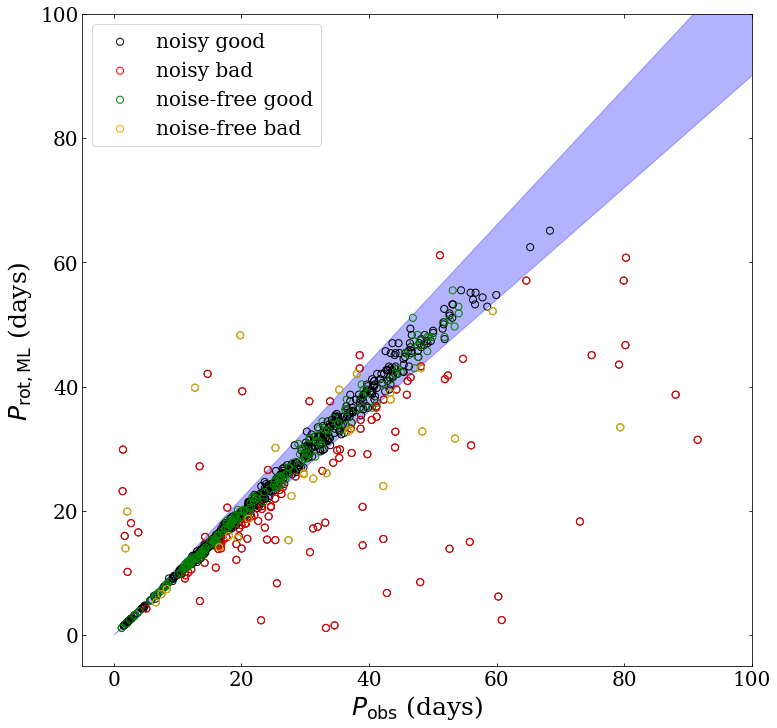

In [17]:
df = pd.read_csv ('aigrain_classified_with_80d.csv', index_col=0)

fig, ax = plt.subplots (1, 1, figsize=(12, 12))

ax.set_ylabel (r'$P_\mathrm{rot,ML}$ (days)', fontsize=25)

ax.set_xlabel (r'$P_\mathrm{obs}$ (days)', fontsize=25)
ax.set_xlim (-5, 100)
ax.set_ylim (-5, 100)
ax.fill_between ([0,150], [0,135], [0,165], alpha=0.3, color='blue')
#ax.fill_between ([0,150], [0,165], [0,195], alpha=0.1, color='green')
#ax.fill_between ([0,150], [0,135], [0,105], alpha=0.1, color='green')

cond = noisy['label_rot']=='Prot'
cond_10 = (np.abs (noisy['Prot_ML'] - noisy['Pobs']) < 0.1 * noisy['Pobs'])
#ax.scatter (noisy['Pobs'], noisy['Prot_ML'], color='red')
ax.scatter (noisy.loc[(cond), 'Pobs'], noisy.loc[(cond), 'Prot_ML'], facecolors='none', edgecolor='black', marker ='o', s=50, label='noisy good')
ax.scatter (noisy.loc[(cond)&(~cond_10), 'Pobs'], noisy.loc[(cond)&(~cond_10), 'Prot_ML'], facecolors='none', edgecolor='red', marker ='o', s=50,
           label='noisy bad')

cond = free['label_rot']=='Prot'
cond_10 = (np.abs (free['Prot_ML'] - free['Pobs']) < 0.1 * free['Pobs'])
#ax.scatter (free['Pobs'], free['Prot_ML'], color='red')
ax.scatter (free.loc[cond, 'Pobs'], free.loc[cond, 'Prot_ML'], facecolors='none', edgecolor='green', marker='o', s=50, label='noise-free good')
ax.scatter (free.loc[(cond)&(~cond_10), 'Pobs'], free.loc[(cond)&(~cond_10), 'Prot_ML'], facecolors='none', edgecolor='orange', marker='o', s=50,
           label='noise-free bad')

ax.tick_params (axis='both', labelsize=20)
ax.legend (loc=2, fontsize=20)

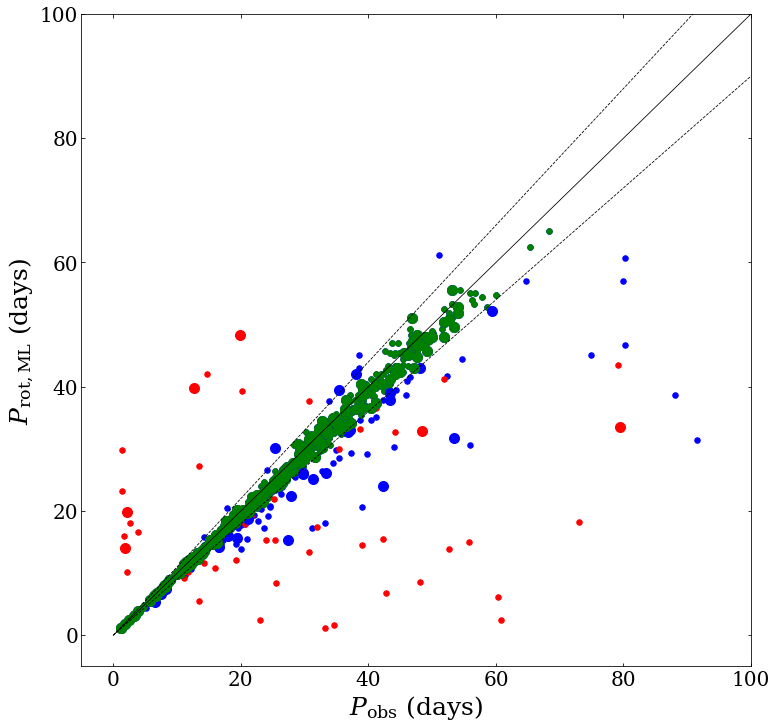

In [1]:

df = pd.read_csv ('aigrain_classified_with_80d.csv', index_col=0)

fig, ax = plt.subplots (1, 1, figsize=(12, 12))

ax.set_ylabel (r'$P_\mathrm{rot,ML}$ (days)', fontsize=25)

ax.set_xlabel (r'$P_\mathrm{obs}$ (days)', fontsize=25)
ax.set_xlim (-5, 100)
ax.set_ylim (-5, 100)

ax.plot ([0, 150], [0, 150], color='black')
ax.plot ([0, 150], [0, 135], '--', color='black')
ax.plot ([0, 150], [0, 165], '--', color='black')

#ax.fill_between ([0,150], [0,135], [0,165], alpha=0.3, color='white')
#ax.fill_between ([0,150], [0,165], [0,195], alpha=0.1, color='green')
#ax.fill_between ([0,150], [0,135], [0,105], alpha=0.1, color='green')

cond = df['label_rot']=='Prot'
cond_min = (df['Prot_ML']+ df['Prot_error'] > df['Pobs_min'])
cond_max = (df['Prot_ML']- df['Prot_error'] < df['Pobs_max'])
cond_10 = (np.abs (df['Prot_ML'] - df['Pobs']) < 0.1 * df['Pobs'])
cond_ok = (cond_10)|((cond_min)&(cond_max))
cond_free = df['KID']==0

ax.scatter (df.loc[(cond)&(cond_ok), 'Pobs'], df.loc[(cond)&(cond_ok), 'Prot_ML'], facecolors='blue', marker ='o', s=30, label='ok')
ax.scatter (df.loc[(cond)&(cond_10), 'Pobs'], df.loc[(cond)&(cond_10), 'Prot_ML'], facecolors='green', marker ='o', s=30, label='good')
ax.scatter (df.loc[(cond)&(~cond_ok), 'Pobs'], df.loc[(cond)&(~cond_ok), 'Prot_ML'], facecolors='red', marker ='o', s=30, label='bad')

ax.scatter (df.loc[(cond)&(cond_ok)&(cond_free), 'Pobs'], df.loc[(cond)&(cond_ok)&(cond_free), 'Prot_ML'], facecolors='blue', marker ='o', s=100)
ax.scatter (df.loc[(cond)&(cond_10)&(cond_free), 'Pobs'], df.loc[(cond)&(cond_10)&(cond_free), 'Prot_ML'], facecolors='green', marker ='o', s=100)
ax.scatter (df.loc[(cond)&(~cond_ok)&(cond_free), 'Pobs'], df.loc[(cond)&(~cond_ok)&(cond_free), 'Prot_ML'], facecolors='red', marker ='o', s=100)


ax.tick_params (axis='both', labelsize=20)
#ax.legend (loc=2, fontsize=20)

plt.savefig ('../data/plot/comparison_aigrain.pdf', format='pdf')

In [59]:
free.loc[free['label_rot']!='Prot']

label_rot    Prot_ML  Prot_error       Sph_ML  Sph_error  proba_Prot  \
KIC                                                                          
750.0     norot   4.851982    0.186634   287.504238  16.695100    0.446667   
754.0     norot  16.304688    2.238790   484.853847  15.362300    0.246667   
760.0     norot  34.647896    3.949710   404.625515   8.796700    0.146667   
787.0     norot   1.885853    0.292927   140.916820  13.160500    0.323333   
801.0     norot  19.904982    1.070030    14.364139   0.441813    0.470000   
807.0     norot  24.001215    3.187360   954.084438  24.898500    0.453333   
823.0     norot  21.208944    3.225990    29.384281   0.855679    0.430000   
845.0     norot  26.079124    3.844280   179.961239   4.508610    0.290000   
846.0     norot  18.526192    2.729920   181.900753   5.408030    0.216667   
847.0     norot  30.567074    2.170060    89.467029   2.073310    0.480000   
848.0     norot  12.321515    0.886154   111.730160   4.076770    0.480000   
864.0     norot  48.340145    7.461420   389.638973   7.165640    0.326667   
881.0     norot  15.294617    1.307330   582.812893  19.056800    0.490000   
893.0     norot  57.070293    4.343910   380.164028   6.435080    0.360000   
894.0     norot  43.864216    7.028250  1481.648525  28.592700    0.423333   
896.0     norot  39.838669    7.471730   308.356594   6.248110    0.400000   
898.0     norot  20.318096    1.997320   155.805401   4.423520    0.340000   
905.0     norot  62.032413    7.357890   335.105587   5.441030    0.396667   
909.0     norot  45.739666    9.807520    97.475872   1.846170    0.306667   
928.0     norot  27.541439    3.335450   243.226574   5.928760    0.343333   
942.0     norot  33.466114    2.780360    46.217609   1.046770    0.466667   
963.0     norot  22.227562    2.505490    94.274822   2.561620    0.326667   
964.0     norot  22.863480    4.620150    22.688984   0.612109    0.440000   

       KID    Pobs  Pobs_min  Pobs_max  
KIC                                     
750.0  0.0    5.61      4.78      6.54  
754.0  0.0   23.37     15.31     33.24  
760.0  0.0   34.81     34.81     34.81  
787.0  0.0    2.40      1.22      3.99  
801.0  0.0    2.08      1.95      2.20  
807.0  0.0   25.86     23.91     28.05  
823.0  0.0    3.22      1.62      4.79  
845.0  0.0  139.41     76.48    259.16  
846.0  0.0   30.12     16.59     46.72  
847.0  0.0   73.90     49.80    105.60  
848.0  0.0   13.34     12.61     14.12  
864.0  0.0   51.69     18.04    103.51  
881.0  0.0   27.38     14.42     46.29  
893.0  0.0   10.65     10.41     10.94  
894.0  0.0   37.65     37.65     37.65  
896.0  0.0   12.71     12.71     12.71  
898.0  0.0   32.32     19.23     49.87  
905.0  0.0   60.86     54.97     68.21  
909.0  0.0    1.58      1.55      1.62  
928.0  0.0  100.53     64.13    147.06  
942.0  0.0   79.40     46.05    116.89  
963.0  0.0   20.92     20.92     20.92  
964.0  0.0    1.17      1.15      1.18

In [60]:
noisy.loc[noisy['label_rot']!='Prot']

label_rot    Prot_ML  Prot_error      Sph_ML  Sph_error  proba_Prot  \
KIC                                                                         
2.0       norot  18.097681    2.686480  290.809810    8.75087    0.180000   
4.0       norot  17.575775    1.641730  608.608242   18.57750    0.156667   
7.0       norot  13.374421    1.644500  434.785671   15.20940    0.450000   
9.0       norot  25.379763    3.939300  320.418239    8.13882    0.366667   
11.0      norot  15.396517    1.943340  631.612881   20.59700    0.450000   
...         ...        ...         ...         ...        ...         ...   
716.0     norot  50.032684    7.241510  371.647274    6.72343    0.370000   
730.0     norot  48.333534    4.238140  539.575588    9.92992    0.296667   
741.0     norot  31.952847    4.020300  208.722744    4.72785    0.166667   
743.0     norot  20.463386    0.092326  292.427700    8.27385    0.350000   
748.0     norot  10.671629    0.878296  225.356808    8.83403    0.200000   

              KID    Pobs  Pobs_min  Pobs_max  
KIC                                            
2.0     1431090.0   17.04     17.04     17.04  
4.0     2016950.0   70.03     53.33     89.21  
7.0     2283850.0   30.74     29.74     31.64  
9.0     2304940.0   33.94     32.67     35.37  
11.0    2307470.0   24.01     19.51     29.33  
...           ...     ...       ...       ...  
716.0  10736900.0   12.26     12.26     12.26  
730.0  11363000.0   52.66     41.16     67.73  
741.0  11772700.0   63.10     44.13     89.63  
743.0  11821000.0   20.84     15.69     26.68  
748.0  12016700.0  170.03     56.86    363.07  

[100 rows x 10 columns]

In [67]:
mainDir = path.abspath ('..')
ref = pd.read_csv (path.join (mainDir, 'data/input_samples/periods_simu_aigrain.csv'), index_col=0)
df = pd.read_csv ('aigrain_classified.csv', index_col=0)
cond_med = (np.abs (df['Prot_ML'] - df['Pobs']) < 0.1 * df['Pobs'])
display (df.loc[(~cond_med)&(df['label_rot']=='Prot')])
print (df.loc[(~cond_med)&(df['label_rot']=='Prot')].to_string ())

label_rot    Prot_ML  Prot_error       Sph_ML  Sph_error  proba_Prot  \
KIC                                                                           
15.0        Prot  14.475616    1.048200   493.486538   16.59560    0.636667   
19.0        Prot  31.452292    4.178520  1002.126736   22.85730    0.736667   
20.0        Prot   9.132726    0.836641   488.550991   20.69110    0.543333   
30.0        Prot  20.629812    1.889170   529.491298   14.91680    0.880000   
34.0        Prot  39.269871    5.471910   370.500881    7.56561    0.543333   
...          ...        ...         ...          ...        ...         ...   
981.0       Prot  42.986534    5.016890   199.615230    3.89508    0.760000   
986.0       Prot  32.785206    3.705680  1418.658047   31.67160    0.953333   
991.0       Prot  14.177846    1.395630   603.304104   20.48470    0.953333   
998.0       Prot  26.104330    2.410420   430.248104   10.76830    0.926667   
1000.0      Prot  26.076746    3.688310   122.660076    3.07474    0.516667   

              KID   Pobs  Pobs_min  Pobs_max  
KIC                                           
15.0    2438930.0  16.46     14.53     18.01  
19.0    2583680.0  91.53     34.08    176.92  
20.0    2585850.0  11.14     10.02     12.30  
30.0    2990800.0  24.60     22.41     26.93  
34.0    3115280.0  20.12     16.25     24.67  
...           ...    ...       ...       ...  
981.0         0.0  48.14     44.72     52.29  
986.0         0.0  36.73     33.39     41.00  
991.0         0.0  16.51     13.82     20.11  
998.0         0.0  29.81     23.95     39.71  
1000.0        NaN    NaN       NaN       NaN  

[126 rows x 10 columns]

       label_rot    Prot_ML  Prot_error       Sph_ML  Sph_error  proba_Prot         KID    Pobs  Pobs_min  Pobs_max
KIC                                                                                                                
15.0        Prot  14.475616    1.048200   493.486538   16.59560    0.636667   2438930.0   16.46     14.53     18.01
19.0        Prot  31.452292    4.178520  1002.126736   22.85730    0.736667   2583680.0   91.53     34.08    176.92
20.0        Prot   9.132726    0.836641   488.550991   20.69110    0.543333   2585850.0   11.14     10.02     12.30
30.0        Prot  20.629812    1.889170   529.491298   14.91680    0.880000   2990800.0   24.60     22.41     26.93
34.0        Prot  39.269871    5.471910   370.500881    7.56561    0.543333   3115280.0   20.12     16.25     24.67
37.0        Prot  18.390474    2.171450   495.418484   14.78350    0.833333   3118950.0   22.62     16.96     30.75
70.0        Prot   6.799856    0.560113   358.360073   17.58050    0.686

In [21]:
#ref[ref['Pobs']>60]
#display (df.loc[df['Pobs']>55])
display (df)

label_rot    Prot_ML  Prot_error      Sph_ML  Sph_error  proba_Prot  \
KIC                                                                          
0.0        norot   8.839442    0.203962  433.309322   18.65590    0.293333   
1.0         Prot   1.844148    0.121071  186.157162   17.53230    0.760000   
2.0        norot  18.097681    2.686480  290.809810    8.75087    0.236667   
3.0         Prot  42.375065    3.451500  636.660061   12.51180    0.930000   
4.0        norot  54.379948    4.681090  742.093532   12.87520    0.243333   
...          ...        ...         ...         ...        ...         ...   
1000.0      Prot  26.076746    3.688310  122.660076    3.07474    0.590000   
1001.0      Prot  21.032764    4.245010  307.750393    8.58109    0.510000   
1002.0      Prot  11.827035    1.853870  225.464184    8.38727    0.513333   
1003.0     norot  33.665916    2.002040  189.131634    4.17077    0.443333   
1004.0      Prot  26.963747    3.184270   44.877487    1.10974    0.640000   

              KID   Pobs  Pobs_min  Pobs_max  
KIC                                           
0.0      893468.0   1.51      1.26      1.77  
1.0     1163450.0   1.87      1.75      2.02  
2.0     1431090.0  17.04     17.04     17.04  
3.0     1849570.0  45.44     43.27     48.07  
4.0     2016950.0  70.03     53.33     89.21  
...           ...    ...       ...       ...  
1000.0        NaN    NaN       NaN       NaN  
1001.0        NaN    NaN       NaN       NaN  
1002.0        NaN    NaN       NaN       NaN  
1003.0        NaN    NaN       NaN       NaN  
1004.0        NaN    NaN       NaN       NaN  

[1004 rows x 10 columns]

In [61]:
mainDir = os.path.abspath ('..')
file_train = 'kepler_km_sample.csv'
train_km = pd.read_csv (path.join (mainDir, 'data/input_samples', file_train), index_col=0)
ref = pd.read_csv (path.join (mainDir, 'data/input_samples/periods_simu_aigrain.csv'), index_col=0)

to_remove = np.intersect1d (train_km.index, ref['KID'])
train_km.loc[to_remove, ['label_rot', 'Prot']]

label_rot       Prot
6271120.0      norot        NaN
8182160.0       Prot  20.491209
8526430.0      norot        NaN
8548410.0      norot        NaN
10280600.0      Prot  31.280712

In [45]:
from flag_filter import flag_filter
from finding_harmonics import find_harmonic_nc

mainDir = path.abspath ('../../star_rotation')
filename='table_aigrain_with_80d.csv'
df_in = pd.read_csv (path.join(mainDir, 'data/rotation_tables', filename), index_col=0)
df = pd.read_csv ('aigrain_classified_with_80d.csv', index_col=0)

cond = df['label_rot']=='Prot'

df = df.join (df_in)

df['flag_check'] = 0

df = df.rename (columns={'Prot_ML':'Prot_pred', 'label_period':'label_pred',
                         'Pobs':'Prot'})

#short trend
df.loc[(df['Prot_pred']<1.6)&cond, 'flag_check'] = 20

df.loc[(df['proba_Prot']>0.4)&(df['proba_Prot']<0.8), 'flag_check'] = 16

#Filter reattribution
thresh = 0.15
df = flag_filter (df, thresh=thresh, only_gwps=True)
df.loc[df['flag_check']==1, 'flag_check'] = 14
df.loc[(df['flag_check']==1)&cond, 'flag_check'] = 0

#instrumental modulation
df.loc[(df['Prot_pred']>38)&cond, 'flag_check'] = 12

#harmonic selection
s = find_harmonic_nc (df.loc[cond], low=1.7, up=2.3, use_all_filter=True)
thresh = 0
df.loc[(s>thresh)&cond, 'flag_check'] = 10


out = np.abs(df['Prot_pred']-df['Prot'])>0.1*df['Prot']
cond_min = (df['Prot_pred'] + df['Prot_error'] > df['Pobs_min'])
cond_max = (df['Prot_pred'] - df['Prot_error'] < df['Pobs_max'])
cond_ok = (~out)|((cond_min)&(cond_max))
cond_free = df['KID']==0

print ('Number of stars flagged for visual check in the sample', df.loc[df['flag_check']>0].index.size)

print ('Noisy stars not ok to visually check', df.loc[(df['flag_check']>0)&~cond_ok&~cond_free&cond].index.size)
#display (df.loc[(df['flag_check']>0)&~cond_ok&~cond_free&cond])

print ('Noise-free stars not ok to visually check', df.loc[(df['flag_check']>0)&~cond_ok&cond_free&cond].index.size)
#display (df.loc[(df['flag_check']>0)&~cond_ok&cond_free&cond])

print ('Noisy stars not detected to visually check', df.loc[(df['flag_check']>0)&~cond_free&~cond].index.size)
#display (df.loc[(df['flag_check']>0)&~cond_free&~cond])

print ('Noise-free stars not detected to visually check', df.loc[(df['flag_check']>0)&cond_free&~cond].index.size)
#display (df.loc[(df['flag_check']>0)&cond_free&~cond])

display (df['flag_check'])

Number of stars for which filter condition will change Prot: 24
Number of stars flagged for visual check in the sample 362
Noisy stars not ok to visually check 36
Noise-free stars not ok to visually check 7
Noisy stars not detected to visually check 41
Noise-free stars not detected to visually check 9


KIC
0.0        0
1.0       16
2.0        0
3.0       12
4.0        0
          ..
1000.0    16
1001.0    -1
1002.0    10
1003.0    16
1004.0    16
Name: flag_check, Length: 1004, dtype: int64